# Preprocessing & Exploratory Data Analysis

Brief: Notebook for preprocessing and exploring the processed trip data files.

- Objectives:
  - Load processed trip data
  - Explore station-level summaries
  - Analyze monthly trends
  - Create visualizations
  - Generate insights

In [1]:
# Common imports
import os
import sys
import json
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
sns.set_theme(style="whitegrid")

# Project paths
PROJECT_ROOT = Path('/Users/shirley/Documents/Research/demand/parkchargebike')
TRIP_DIR = PROJECT_ROOT / 'trip'
CODE_DIR = PROJECT_ROOT / 'code'

print(f"Project root: {PROJECT_ROOT}")
print(f"Trip dir: {TRIP_DIR}")
print(f"Code dir: {CODE_DIR}")

Project root: /Users/shirley/Documents/Research/demand/parkchargebike
Trip dir: /Users/shirley/Documents/Research/demand/parkchargebike/trip
Code dir: /Users/shirley/Documents/Research/demand/parkchargebike/code


In [4]:
# List all files in trip directory
trip_files = list(TRIP_DIR.glob('*.csv'))
print(f"Found {len(trip_files)} CSV files in trip directory:")
for file in sorted(trip_files):
    print(f"  - {file.name}")

Found 55 CSV files in trip directory:
  - 202101-station-summary.csv
  - 202102-station-summary.csv
  - 202103-station-summary.csv
  - 202104-station-summary.csv
  - 202105-station-summary.csv
  - 202106-station-summary.csv
  - 202107-station-summary.csv
  - 202108-station-summary.csv
  - 202109-station-summary.csv
  - 202110-station-summary.csv
  - 202111-station-summary.csv
  - 202112-station-summary.csv
  - 202201-station-summary.csv
  - 202202-station-summary.csv
  - 202203-station-summary.csv
  - 202204-station-summary.csv
  - 202205-station-summary.csv
  - 202206-station-summary.csv
  - 202207-station-summary.csv
  - 202208-station-summary.csv
  - 202209-station-summary.csv
  - 202210-station-summary.csv
  - 202211-station-summary.csv
  - 202212-station-summary.csv
  - 202301-station-summary.csv
  - 202302-station-summary.csv
  - 202303-station-summary.csv
  - 202304-station-summary.csv
  - 202305-station-summary.csv
  - 202306-station-summary.csv
  - 202307-station-summary.csv
 

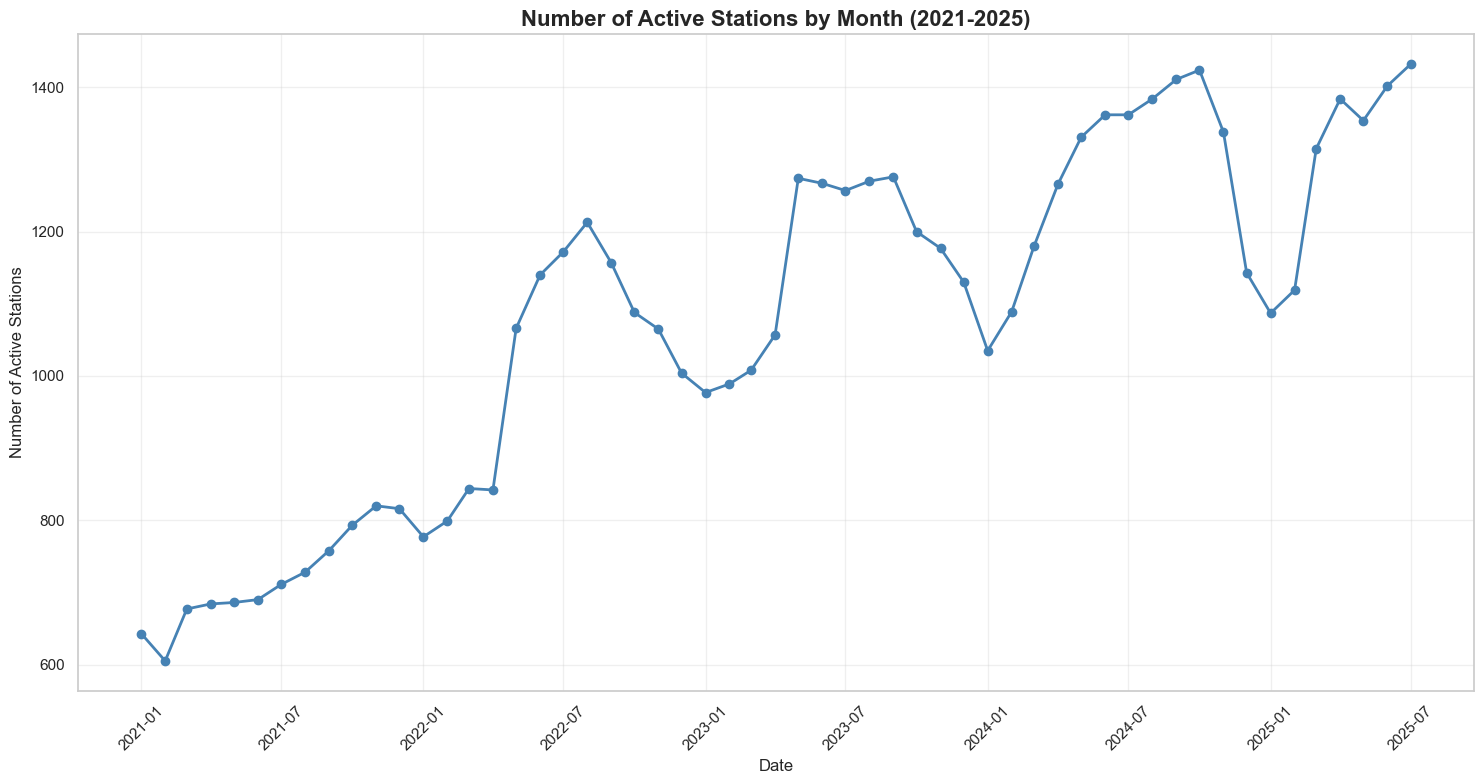

Summary Statistics:
Total months: 55
Average active stations: 1074
Min active stations: 605
Max active stations: 1432
Standard deviation: 247

Monthly Active Stations Data:
   year  month  active_stations
0  2021      1              643
1  2021      2              605
2  2021      3              677
3  2021      4              684
4  2021      5              686
5  2021      6              690
6  2021      7              711
7  2021      8              728
8  2021      9              758
9  2021     10              793


In [3]:
# Load monthly active stations data and create plot
monthly_stations = pd.read_csv(TRIP_DIR / 'monthly-active-stations.csv')

# Create datetime column for better plotting
monthly_stations['date'] = pd.to_datetime(monthly_stations[['year', 'month']].assign(day=1))

# Plot active stations by month
plt.figure(figsize=(15, 8))
plt.plot(monthly_stations['date'], monthly_stations['active_stations'], 
         marker='o', linewidth=2, markersize=6, color='steelblue')

plt.title('Number of Active Stations by Month (2021-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Active Stations', fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add some styling
plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(f"Total months: {len(monthly_stations)}")
print(f"Average active stations: {monthly_stations['active_stations'].mean():.0f}")
print(f"Min active stations: {monthly_stations['active_stations'].min()}")
print(f"Max active stations: {monthly_stations['active_stations'].max()}")
print(f"Standard deviation: {monthly_stations['active_stations'].std():.0f}")

# Show the data
print("\nMonthly Active Stations Data:")
print(monthly_stations[['year', 'month', 'active_stations']].head(10))